In [1]:
#Importing all the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,f1_score,precision_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Reading the dataset
df=pd.read_csv('Happiness_survey_data.csv')
df.head()

,D,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [4]:
df.shape

(143, 7)

In [5]:
df.dtypes

D     int64
X1    int64
X2    int64
X3    int64
X4    int64
X5    int64
X6    int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
D     143 non-null int64
X1    143 non-null int64
X2    143 non-null int64
X3    143 non-null int64
X4    143 non-null int64
X5    143 non-null int64
X6    143 non-null int64
dtypes: int64(7)
memory usage: 7.9 KB


In [7]:
#Checking the null values(if any)
df.isnull().sum()

D     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

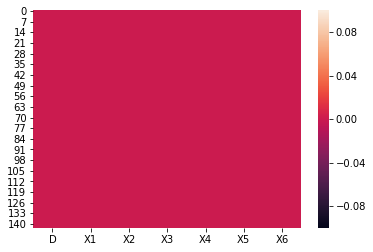

In [8]:
sns.heatmap(df.isnull())
plt.show()

In [9]:
#Statistical Summary of the Data
df.describe()

,D,X1,X2,X3,X4,X5,X6
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.538462,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783
std,0.500271,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [10]:
#checking the correlation
dfcor=df.corr()

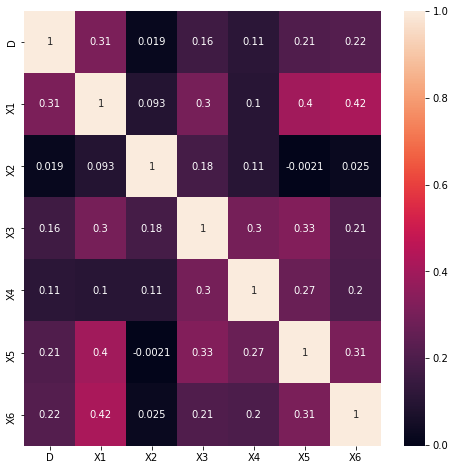

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(dfcor,annot=True)
plt.show()

In [12]:
#Univariate Analysis

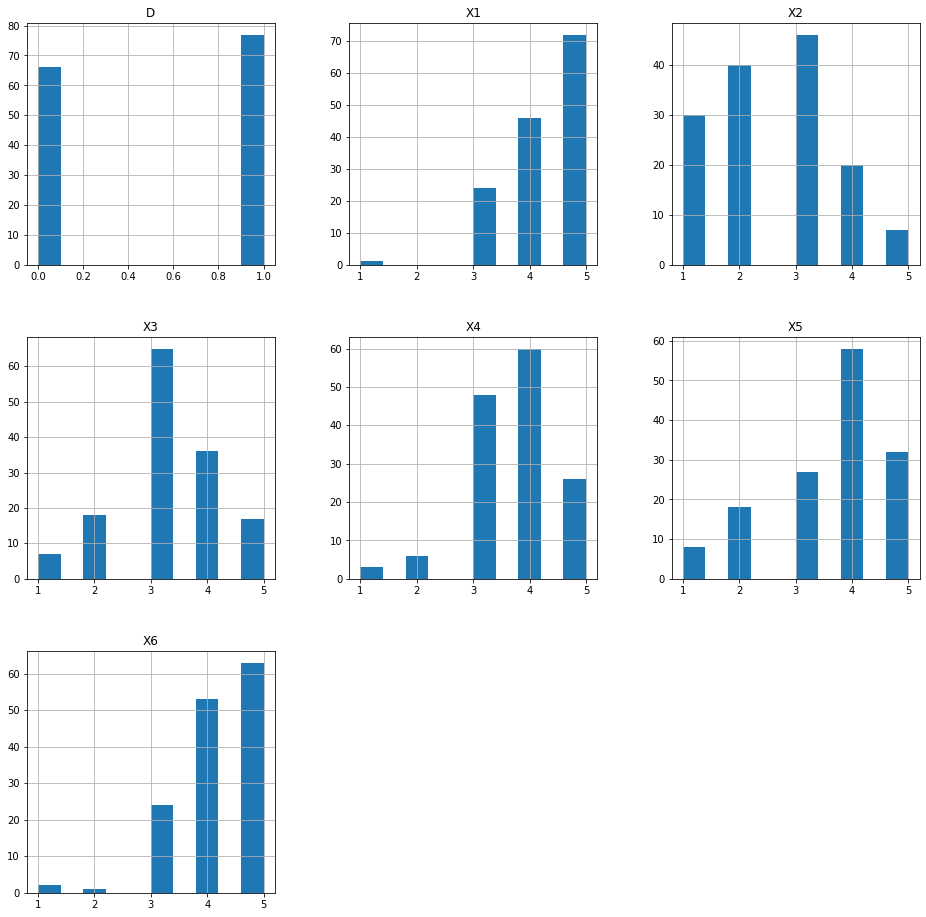

In [13]:
df.hist(figsize=(16,16))
plt.show()

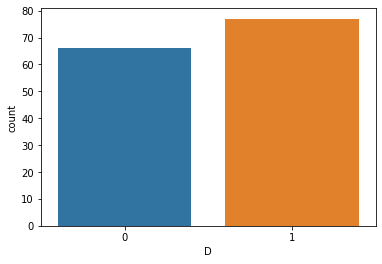

In [14]:
sns.countplot(x='D',data=df)
plt.show()

In [15]:
#Bivariate Analysis

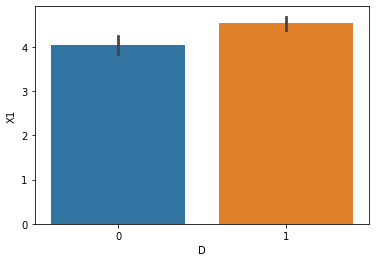

In [16]:
sns.barplot(x='D',y='X1',data=df)
plt.show()

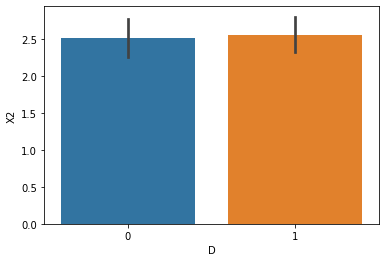

In [17]:
sns.barplot(x='D',y='X2',data=df)
plt.show()

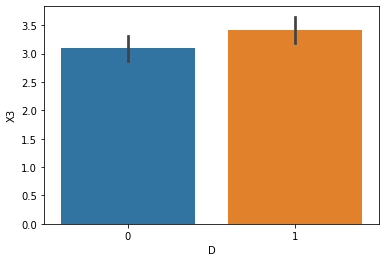

In [18]:
sns.barplot(x='D',y='X3',data=df)
plt.show()

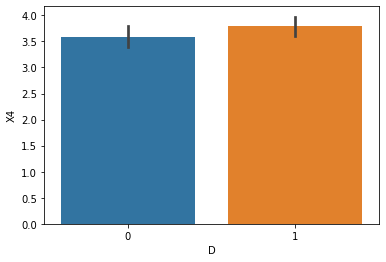

In [19]:
sns.barplot(x='D',y='X4',data=df)
plt.show()

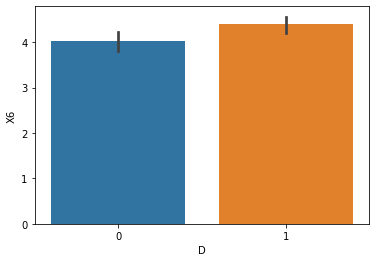

In [20]:
sns.barplot(x='D',y='X6',data=df)
plt.show()

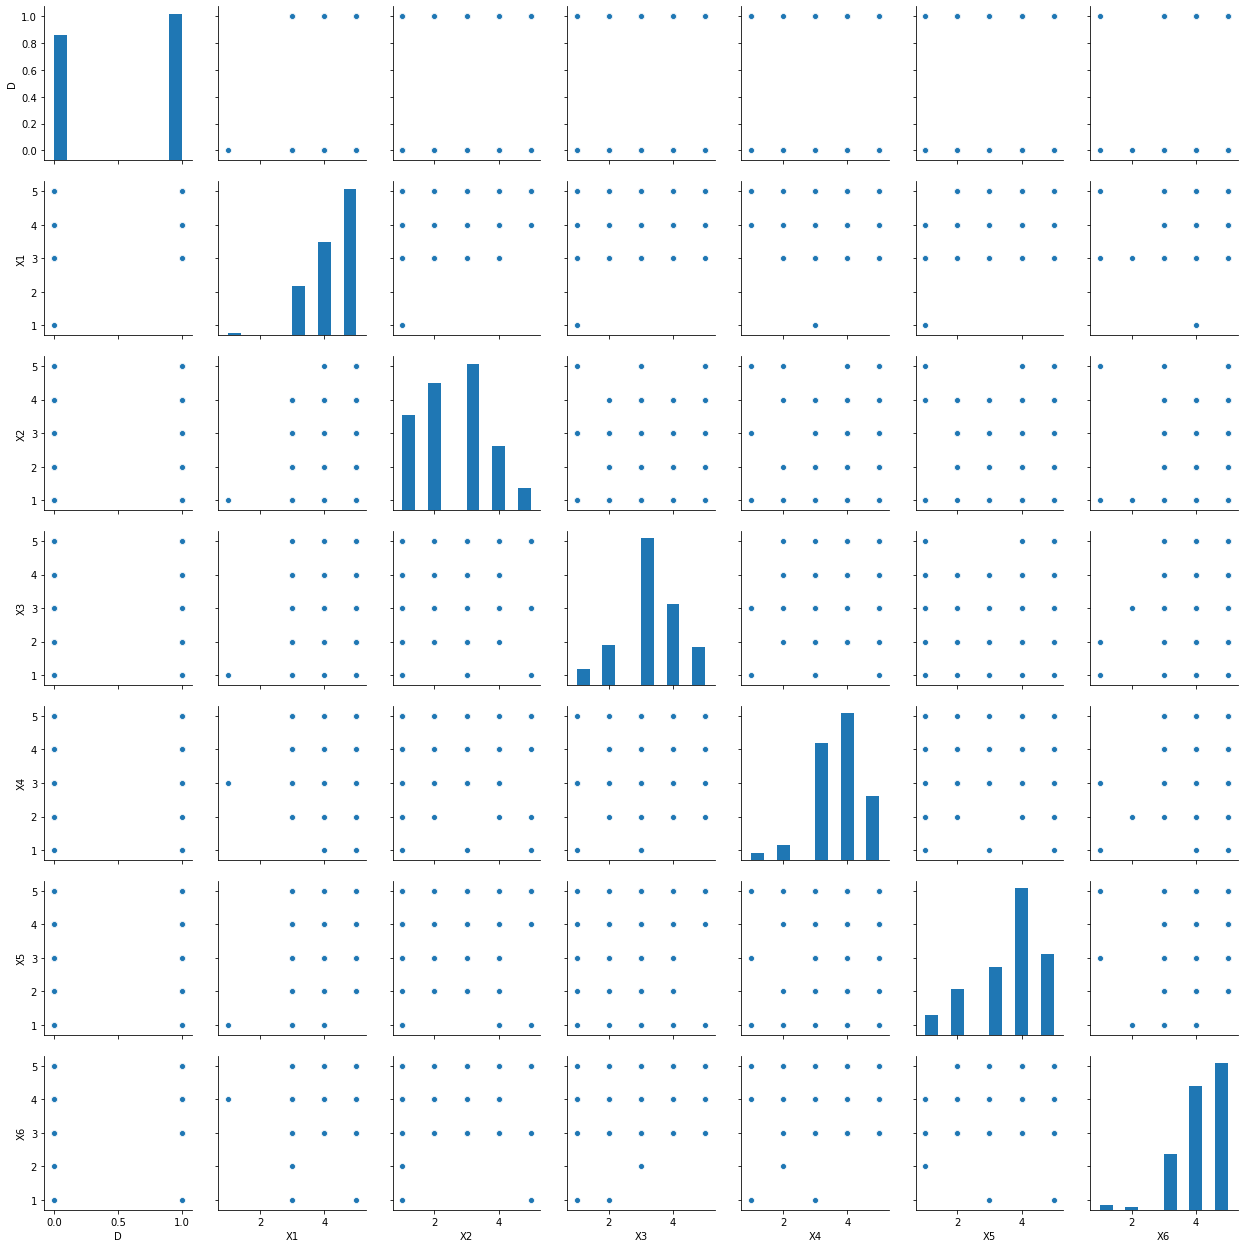

In [21]:
sns.pairplot(df)
plt.show()

In [22]:
collist=df.columns.values
ncol=12
nrows=10

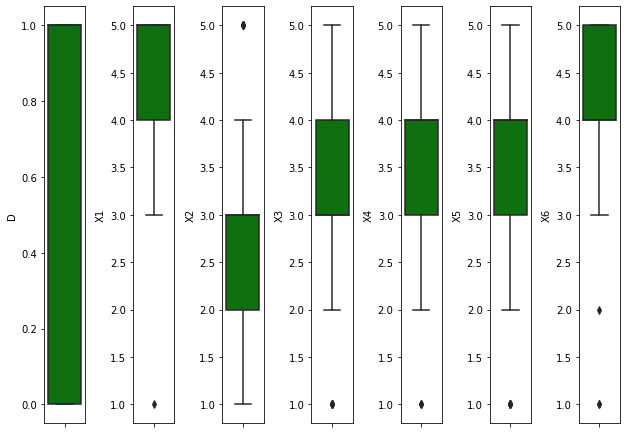

In [23]:
plt.figure(figsize=(15,60))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

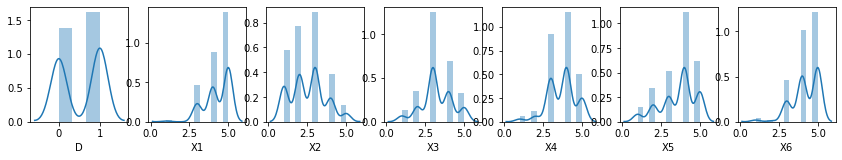

In [24]:
plt.figure(figsize=(25,25))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [25]:
#Checking the skewness 
df.skew()

D    -0.155944
X1   -0.966144
X2    0.285491
X3   -0.118415
X4   -0.468723
X5   -0.675393
X6   -1.062909
dtype: float64

In [26]:
#As there are few skewed values, we try correct it by using log transformation
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.lop1p(df[col])

In [27]:
df.skew()

D    -0.155944
X1   -0.966144
X2    0.285491
X3   -0.118415
X4   -0.468723
X5   -0.675393
X6   -1.062909
dtype: float64

In [28]:
#Checking the Zscore for outliers and removing (if any)
from scipy.stats import zscore
z_score=abs(zscore(df))
df.shape

(143, 7)

In [29]:
df_final=df.loc[(z_score<3).all(axis=1)]
df_final.shape

(138, 7)

In [30]:
#Separating the variables like indenpendent and the target variable
x=df.drop(columns=["D"])
y=df[["D"]]

In [31]:
#Scaling the data using Standard Scaler
sc=StandardScaler()
sc.fit(x)
x=sc.transform(x)

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=68)

In [33]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(107, 6) (36, 6)
(107, 1) (36, 1)


In [34]:
#Lets use RandomForestClassifier for Hyperparameter Tuning

In [35]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
RFC.score(x_test,y_test)

0.5277777777777778

In [37]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.5187027914614122


In [38]:
parameterRFC = { 
            "n_estimators"      : [10,20,30,40,50,100,200],
            "max_features"      : ["auto", "sqrt", "log2"],
            "max_depth"         : [2,3,4,5,None],
            "min_samples_split" : [2,3,4],
            "min_samples_leaf"  : [ 2, 3,4],
            "bootstrap"         : [True, False],
            }


In [39]:
gridRFC = GridSearchCV(RFC, param_grid=parameterRFC, n_jobs=-1, cv=10)
gridRFC.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [40]:
gridRFC.best_score_,gridRFC.best_params_

(0.7289719626168224,
 {'bootstrap': True,
  'max_depth': 4,
  'max_features': 'log2',
  'min_samples_leaf': 2,
  'min_samples_split': 3,
  'n_estimators': 10})

In [41]:
RFC=RandomForestClassifier(bootstrap = False,
max_depth = 3,                        
 max_features= 'auto',
 min_samples_leaf = 4,
 min_samples_split= 4,
 n_estimators= 30)

In [42]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.644367816091954


In [43]:
#Lets use GradientBoostingClassifier for Hyperparameter Tuning

In [44]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [45]:
GBC.score(x_test,y_test)


0.5833333333333334

In [46]:
print(cross_val_score(GBC,x,y,cv=5).mean())

0.5105747126436782


In [47]:
parameterGBC={'n_estimators':[20,50,100,200,500], 
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[2,3,4,5,6], 
            'min_samples_leaf':[3,2,1],
            }


In [48]:
gridGBC= GridSearchCV(GBC, param_grid=parameterGBC, n_jobs=-1, cv=10)
gridGBC.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...None,
                                                  presort='auto

In [49]:
gridGBC.best_score_ , gridGBC.best_params_


(0.719626168224299,
 {'learning_rate': 0.02,
  'max_depth': 2,
  'min_samples_leaf': 3,
  'n_estimators': 20})

In [50]:
GBC=GradientBoostingClassifier(learning_rate= 0.02,
  max_depth= 2,
  min_samples_leaf= 3,
  n_estimators= 20
)

In [51]:
print(cross_val_score(GBC,x,y,cv=5).mean())

0.5536617405582922


In [52]:
from sklearn.externals import joblib
joblib.dump(RFC,"GridSearch_RFC.pkl")

['GridSearch_RFC.pkl']